**Team Members: Manali Shelar(mvshelar@iu.edu) and Aishwarya Hastak(ahastak@iu.edu)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

## Quarterly Gross Domestic Product(GDP) EDA Analysis

In [ ]:
gdp_data = pd.read_csv("GDPC1.csv", index_col=0, parse_dates=True)

In [ ]:
gdp_data.head()

,GDPC1
DATE,
1947-01-01,2034.450
1947-04-01,2029.024
1947-07-01,2024.834
1947-10-01,2056.508
1948-01-01,2087.442


In [ ]:
gdp_data.describe()

,GDPC1
count,304.000000
mean,9110.412997
std,5467.737354
min,2024.834000
25%,4383.321250
50%,7791.688500
75%,14151.619250
max,20182.491000


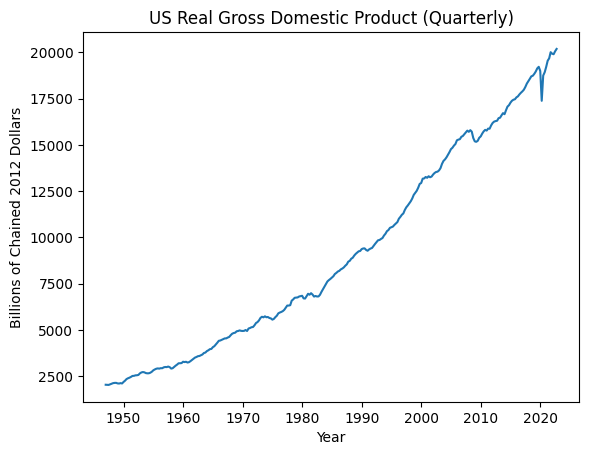

In [ ]:
gdp = pd.DataFrame(gdp_data)

# Plot the GDP data
plt.plot(gdp)
plt.title('US Real Gross Domestic Product (Quarterly)')
plt.xlabel('Year')
plt.ylabel('Billions of Chained 2012 Dollars')
plt.show()

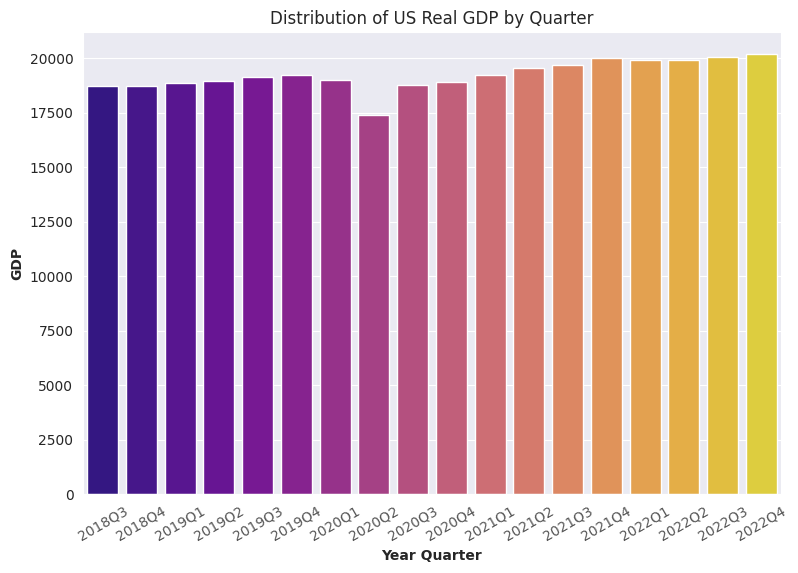

In [ ]:
# New column for year quarter
gdp_df['Year_Quarter'] = gdp_df.index.to_period('Q')

# Select the rows for the past 5 years
last_5_years = gdp_df[gdp_df.index >= pd.to_datetime('today').normalize() - pd.DateOffset(years=5)]



# Bar plot for quarterly GDP for past 5 years
fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x='Year_Quarter',y='GDPC1',data=last_5_years,errorbar=('ci', 95),ax=ax, palette = 'plasma')
ax.set_xlabel('Year Quarter',weight='bold',size=10)
ax.set_ylabel('GDP',weight='bold',size=10)
ax.set_title('Distribution of US Real GDP by Quarter')
plt.xticks(rotation=30,color='#565656')
plt.show()

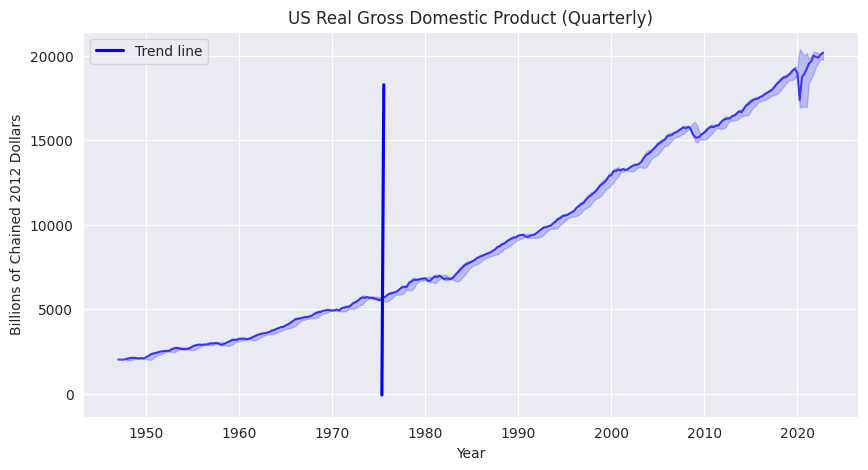

In [ ]:
gdp_annual = gdp.resample('A').last()
gdp_growth = gdp_annual.pct_change()

# Create a line plot with shaded confidence interval and trend line
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.lineplot(data=gdp, x=gdp.index, y='GDPC1', color='blue', alpha=0.7)
sns.regplot(data=gdp, x=gdp.index.year, y='GDPC1', scatter=False, color='blue', label='Trend line')
plt.fill_between(gdp.index, gdp['GDPC1'].rolling(window=4).mean() - gdp['GDPC1'].rolling(window=4).std()*1.96,
                 gdp['GDPC1'].rolling(window=4).mean() + gdp['GDPC1'].rolling(window=4).std()*1.96, alpha=0.2, color='blue')
plt.title('US Real Gross Domestic Product (Quarterly)')
plt.xlabel('Year')
plt.ylabel('Billions of Chained 2012 Dollars')
plt.legend()
plt.show()

In [ ]:
# Resample the data to quarterly frequency
gdp_q = gdp.resample('Q').last()

# Create a heatmap of the quarterly GDP data by year and quarter
fig_heatmap = px.imshow(gdp_q.T, color_continuous_scale='Blues')
fig_heatmap.update_layout(title='US Real Gross Domestic Product (Quarterly) by Year and Quarter', xaxis_title='Quarter', yaxis_title='Year')

# Create a line chart of the quarterly GDP data with a trend line and a rolling mean
fig_line = go.Figure()
fig_line.add_trace(go.Scatter(x=gdp.index, y=gdp['GDPC1'], mode='lines', name='GDP'))
fig_line.add_trace(go.Scatter(x=gdp.index, y=gdp['GDPC1'].rolling(window=4).mean(), mode='lines', name='Rolling mean'))
fig_line.add_trace(go.Scatter(x=gdp.index, y=gdp['GDPC1'].rolling(window=4).mean() + 1.96*gdp['GDPC1'].rolling(window=4).std(), mode='lines', name='Upper bound', line=dict(color='gray', width=0.5)))
fig_line.add_trace(go.Scatter(x=gdp.index, y=gdp['GDPC1'].rolling(window=4).mean() - 1.96*gdp['GDPC1'].rolling(window=4).std(), mode='lines', name='Lower bound', line=dict(color='gray', width=0.5)))
fig_line.update_layout(title='US Real Gross Domestic Product (Quarterly) with Rolling Mean and Confidence Interval', xaxis_title='Year', yaxis_title='Billions of Chained 2012 Dollars')

# Create a dashboard with both visualizations
fig_heatmap.show()
fig_line.show()


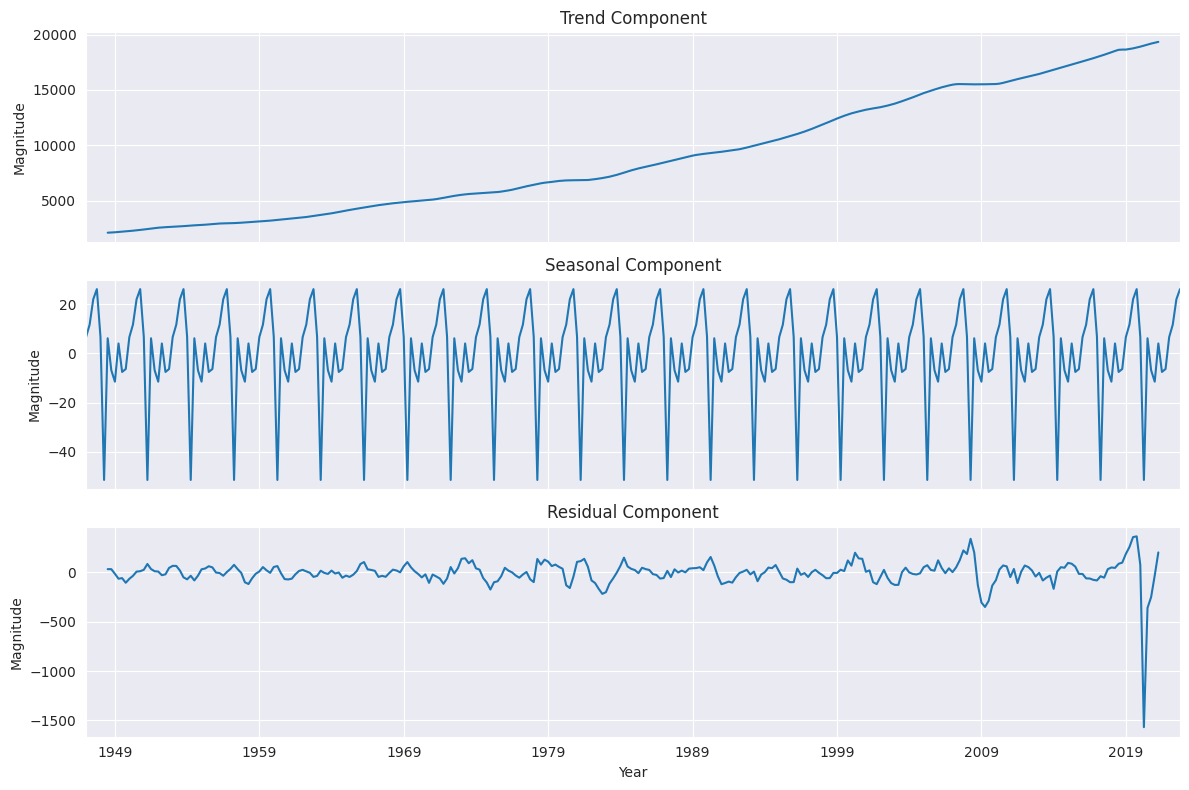

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

gdp_df = pd.DataFrame(gdp_data)
#gdp_df.set_index('DATE', inplace=True)

result = seasonal_decompose(gdp_df['GDPC1'], period=12, model='additive')


fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)

# Plot the trend component
result.trend.plot(ax=axs[0], label='Trend')
axs[0].set_ylabel('Magnitude')
axs[0].set_title('Trend Component')

# Plot the seasonal component
result.seasonal.plot(ax=axs[1], label='Seasonality')
axs[1].set_ylabel('Magnitude')
axs[1].set_title('Seasonal Component')

# Plot the residual component
result.resid.plot(ax=axs[2], label='Residual')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Magnitude')
axs[2].set_title('Residual Component')

plt.tight_layout()
plt.show()

## Yeild Curve

In [ ]:
yield_data = pd.read_csv("yeild_curve_data.csv", index_col=0, parse_dates=True)

In [ ]:
yield_data.tail()

,T10Y3M
DATE,
2023-03-29,-1.23
2023-03-30,-1.42
2023-03-31,-1.37
2023-04-03,-1.47
2023-04-04,-1.53


In [ ]:
yield_data.describe()

,T10Y3M
count,10762
unique,568
top,.
freq,446


In [ ]:
yield_df = yield_data.replace(to_replace=".",
           value= np.nan)

In [ ]:
missing_values = yield_df.isnull().sum()

# Print the result
print(missing_values)

T10Y3M    446
dtype: int64


In [ ]:
# Convert T10Y3M column to numeric data type
yield_df['T10Y3M'] = pd.to_numeric(yield_df['T10Y3M'], errors='coerce')
mean = yield_df['T10Y3M'].mean()
yield_df['T10Y3M'].fillna(mean, inplace=True)

In [ ]:
missing_values = yield_df.isnull().sum()

# Print the result
print(missing_values)

T10Y3M    0
dtype: int64


## Data Collated

In [ ]:
data = pd.read_csv("Data collated.csv")

In [ ]:
data

,Year,Stock index percent change,PPI Percent change,Unemployement Percent Change,GDP percent change,Duration of recession
0,1872,7.30253,NaN,NaN,NaN,NaN
1,1873,-4.56349,NaN,NaN,NaN,3.0
2,1874,-4.74012,NaN,NaN,NaN,12.0
3,1875,-2.88084,NaN,NaN,NaN,12.0
4,1876,-8.65169,NaN,NaN,NaN,12.0
...,...,...,...,...,...,...
146,2018,11.92778,4.34895,-0.466667,5.42025,NaN
147,2019,5.29258,-1.04399,-0.208333,4.12953,NaN
148,2020,10.02201,-2.73550,4.408333,-1.49901,2.0
149,2021,35.29049,16.96176,-2.725000,10.70540,NaN


In [ ]:
data.describe()

,Year,Stock index percent change,PPI Percent change,Unemployement Percent Change,GDP percent change,Duration of recession
count,151.000000,148.000000,109.000000,89.000000,93.000000,70.000000
mean,1947.000000,5.723310,3.211414,-8.534230,6.309975,7.171429
std,43.734045,15.175518,8.179901,138.590063,6.754887,3.893404
min,1872.000000,-48.584350,-36.838810,-1130.695480,-23.089250,1.000000
25%,1909.500000,-4.572750,0.052630,-0.825000,4.129530,4.000000
50%,1947.000000,6.621485,2.344530,-0.316667,6.017600,6.500000
75%,1984.500000,17.020750,6.120500,0.441667,9.383240,12.000000
max,2022.000000,41.708540,37.344630,573.588200,28.337550,12.000000


In [ ]:
missing_values = data.isnull().sum()

# Print the result
print(missing_values)

Year                             0
Stock index percent change       3
PPI Percent change              42
Unemployement Percent Change    62
GDP percent change              58
Duration of recession           81
dtype: int64


In [ ]:
df = pd.DataFrame(data)
# Compute the mean of each column
means = df.mean()

# Replace missing values with the mean of each column
df.fillna(value=means, inplace=True)

In [ ]:
missing_values = df.isnull().sum()

# Print the result
print(missing_values)

Year                            0
Stock index percent change      0
PPI Percent change              0
Unemployement Percent Change    0
GDP percent change              0
Duration of recession           0
dtype: int64


### EDA

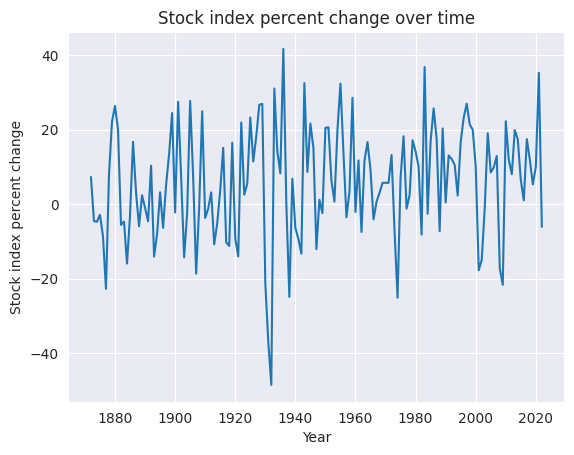

In [ ]:
# Create a line chart of the stock index percent change over time
plt.plot(df['Year'], df['Stock index percent change'])
plt.xlabel('Year')
plt.ylabel('Stock index percent change')
plt.title('Stock index percent change over time')
plt.show()

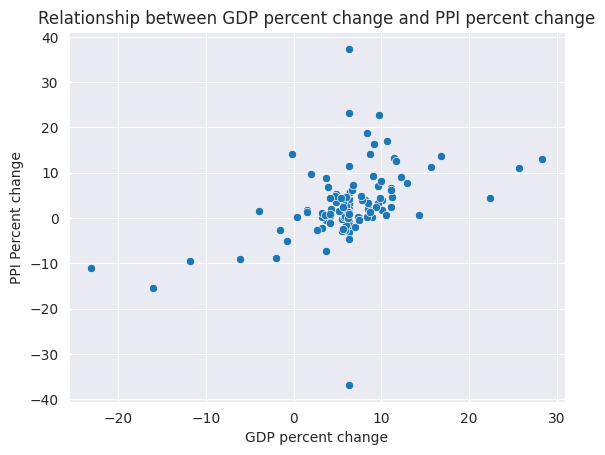

In [ ]:
# Create a scatter plot of GDP percent change vs. PPI percent change
sns.scatterplot(data=df, x='GDP percent change', y='PPI Percent change')
plt.title('Relationship between GDP percent change and PPI percent change')
plt.show()

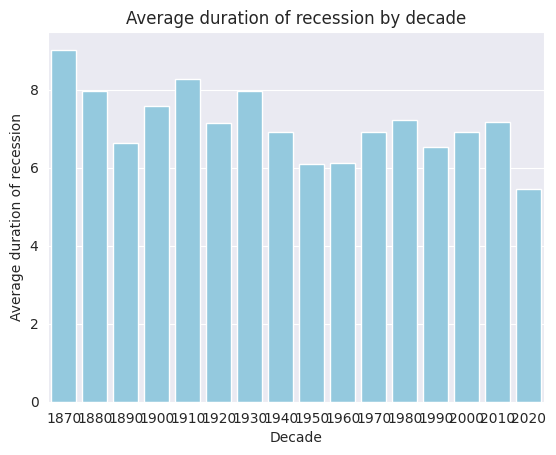

In [ ]:
# Compute the average duration of recession for each decade
df['Decade'] = df['Year'] // 10 * 10
df_avg_duration = df.groupby('Decade')['Duration of recession'].mean().reset_index()

# Create a bar chart of the average duration of recession by decade
sns.barplot(data=df_avg_duration, x='Decade', y='Duration of recession', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Average duration of recession')
plt.title('Average duration of recession by decade')
plt.show()

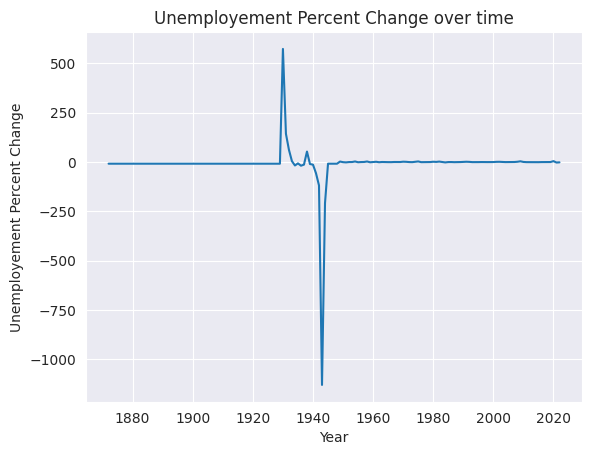

In [ ]:
# Create a line chart of the stock index percent change over time
plt.plot(df['Year'], df['Unemployement Percent Change'])
plt.xlabel('Year')
plt.ylabel('Unemployement Percent Change')
plt.title('Unemployement Percent Change over time')
plt.show()

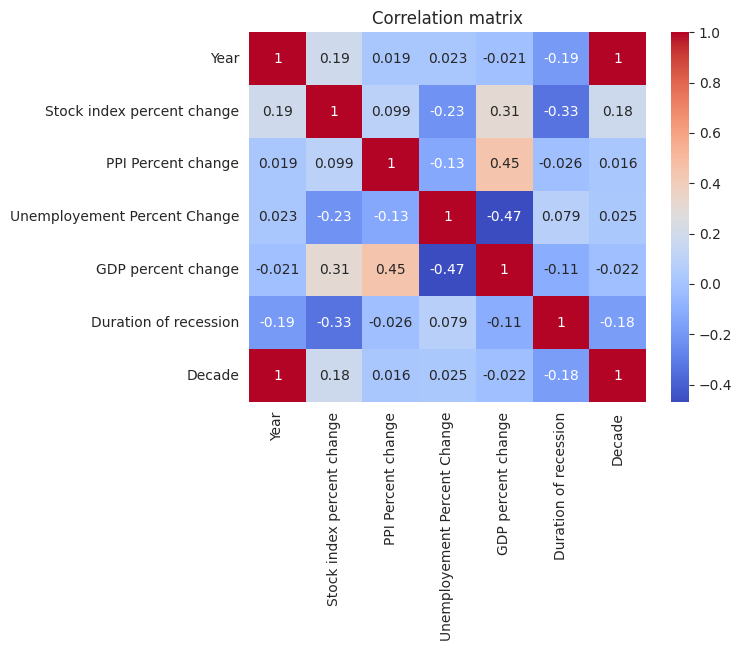

In [ ]:
# Calculate the Pearson correlation coefficients
corr_matrix = df.corr()

# Create a heat map of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

# Modelling

## Sources
1. https://seaborn.pydata.org/
2. https://www.statsmodels.org/stable/user-guide.html#time-series-analysis